Loading required package: xgboost
Parsed with column specification:
cols(
  .default = col_integer(),
  T1_V4 = col_character(),
  T1_V5 = col_character(),
  T1_V6 = col_character(),
  T1_V7 = col_character(),
  T1_V8 = col_character(),
  T1_V9 = col_character(),
  T1_V11 = col_character(),
  T1_V12 = col_character(),
  T1_V15 = col_character(),
  T1_V16 = col_character(),
  T1_V17 = col_character(),
  T2_V3 = col_character(),
  T2_V5 = col_character(),
  T2_V11 = col_character(),
  T2_V12 = col_character(),
  T2_V13 = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_integer(),
  T1_V4 = col_character(),
  T1_V5 = col_character(),
  T1_V6 = col_character(),
  T1_V7 = col_character(),
  T1_V8 = col_character(),
  T1_V9 = col_character(),
  T1_V11 = col_character(),
  T1_V12 = col_character(),
  T1_V15 = col_character(),
  T1_V16 = col_character(),
  T1_V17 = col_character(),
  T2_V3 = col_character(),
  T2_V5 = col_

[1]	train-rmse:5.319649 
[2]	train-rmse:5.293866 
[3]	train-rmse:5.268544 
[4]	train-rmse:5.243382 
[5]	train-rmse:5.218715 
[6]	train-rmse:5.194408 
[7]	train-rmse:5.170296 
[8]	train-rmse:5.146702 
[9]	train-rmse:5.123569 
[10]	train-rmse:5.100636 
[11]	train-rmse:5.078019 
[12]	train-rmse:5.055851 
[13]	train-rmse:5.033758 
[14]	train-rmse:5.012008 
[15]	train-rmse:4.990726 
[16]	train-rmse:4.969798 
[17]	train-rmse:4.949207 
[18]	train-rmse:4.928832 
[19]	train-rmse:4.908636 
[20]	train-rmse:4.888733 
[21]	train-rmse:4.869334 
[22]	train-rmse:4.850276 
[23]	train-rmse:4.831306 
[24]	train-rmse:4.812939 
[25]	train-rmse:4.794813 
[26]	train-rmse:4.777014 
[27]	train-rmse:4.759012 
[28]	train-rmse:4.741516 
[29]	train-rmse:4.724055 
[30]	train-rmse:4.706790 
[31]	train-rmse:4.689873 
[32]	train-rmse:4.673296 
[33]	train-rmse:4.657001 
[34]	train-rmse:4.640928 
[35]	train-rmse:4.625036 
[36]	train-rmse:4.609692 
[37]	train-rmse:4.594108 
[38]	train-rmse:4.579007 
[39]	train-rmse:4.564

Warning message:
“'with.stats' is deprecated.
Use 'with_stats' instead.
See help("Deprecated") and help("xgboost-deprecated").”

[1] "booster[0]"                                                     
 [2] "0:[f29<0.5] yes=1,no=2,missing=1,gain=17599,cover=40719"        
 [3] "1:[f34<0.5] yes=3,no=4,missing=3,gain=8514.45,cover=39503"      
 [4] "3:[f52<0.5] yes=7,no=8,missing=7,gain=3328.95,cover=22941"      
 [5] "7:[f1<12.5] yes=15,no=16,missing=15,gain=2283.62,cover=22370"   
 [6] "15:[f11<0.5] yes=31,no=32,missing=31,gain=1232.36,cover=10324"  
 [7] "31:[f110<1.5] yes=63,no=64,missing=63,gain=402.343,cover=6033"  
 [8] "63:[f0<11.5] yes=115,no=116,missing=115,gain=144.426,cover=2655"
 [9] "115:leaf=0.028337,cover=1364"                                   
[10] "116:leaf=0.0235642,cover=1291"

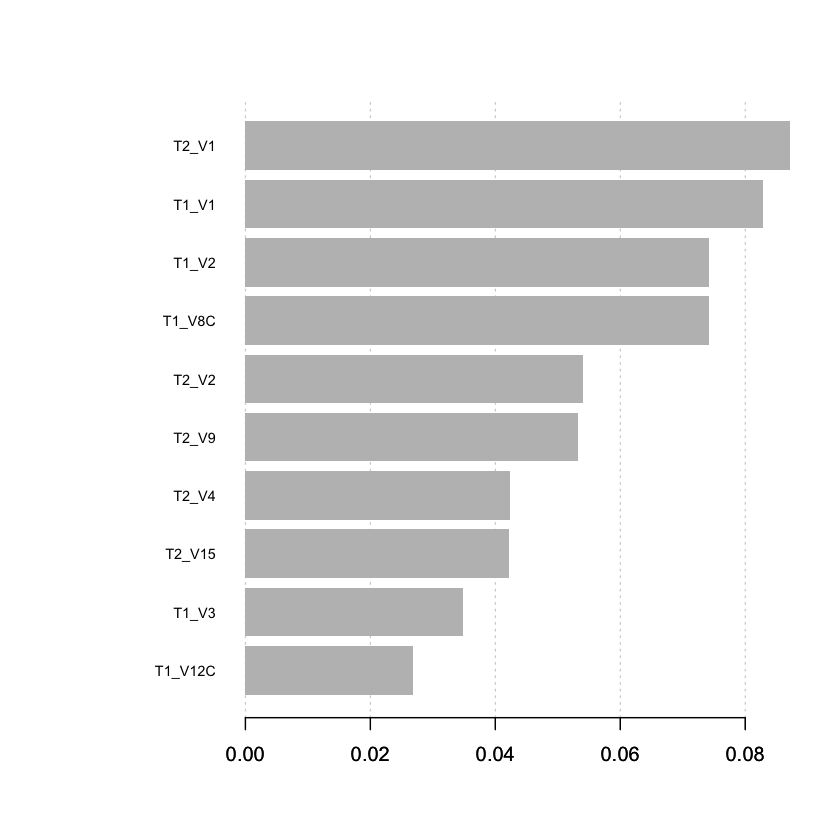

In [3]:
require(xgboost)
library(caret)
library(readr)

# load raw data
train = read_csv('train.csv')
test = read_csv('test.csv')

# Create the response variable
y = train$Hazard

# Create the predictor data set and encode categorical variables using caret library.
mtrain = train[,-c(1,2)]
mtest = test[,-c(1)]
dummies <- dummyVars(~ ., data = mtrain)
mtrain = predict(dummies, newdata = mtrain)
mtest = predict(dummies, newdata = mtest)

# Set necessary parameters and use parallel threads
param <- list("objective" = "reg:linear", "nthread" = 8, "verbose"=0)

# Fit the model
xgb.fit = xgboost(param=param, data = mtrain, label = y, nrounds=1500, eta = .01, max_depth = 7, 
                  min_child_weight = 5, scale_pos_weight = 1.0, subsample=0.8) 

# Predict Hazard for the test set
submission <- data.frame(Id=test$Id)
submission$Hazard <- predict(xgb.fit, mtest)
write_csv(submission, "xgbboost_r_benchmark.csv")

# Let’s see what the model looks like.
model <- xgb.dump(xgb.fit, with.stats = T)
model[1:10]

# Bar graph representing each feature by a horizontal bar. 
# The longer the bar, the more important is the feature. 
# Features are classified by importance and clustered by importance.
names <- dimnames(mtrain)[[2]]
importance_matrix <- xgb.importance(names, model = xgb.fit)
xgb.plot.importance(importance_matrix[1:10,])

In [2]:
install.packages('xgboost')


  There is a binary version available but the source version is later:
        binary  source needs_compilation
xgboost  0.6-4 0.6.4.1              TRUE



installing the source package ‘xgboost’

